In [1]:
import os
import excursion
import excursion.optimize as optimize
import excursion.diagnosis as diagnosis
from excursion.testcases.fast import two_functions as scandetails
import numpy as np
import datetime
import logging
logging.basicConfig(level = logging.INFO)
import excursion.plotting.twodim as plots
import excursion.utils as utils

np.warnings.filterwarnings('ignore')
%pylab inline

/Users/lukas/Code/excursion/venv/lib/python3.6/site-packages/numpy/lib/index_tricks.py:199: ComplexWarning: Casting complex values to real discards the imaginary part
  nn[k] = (nn[k]*step+start)


Populating the interactive namespace from numpy and matplotlib


In [2]:
def plot_and_save(workdir, index, *args,**kwargs):
    fig, axarr = plt.subplots(1, 3, sharey=True)
    fig.set_size_inches(9.5, 3.5)
    plt.title('Iteration {}'.format(index))
    plots.plot(axarr,*args,**kwargs)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

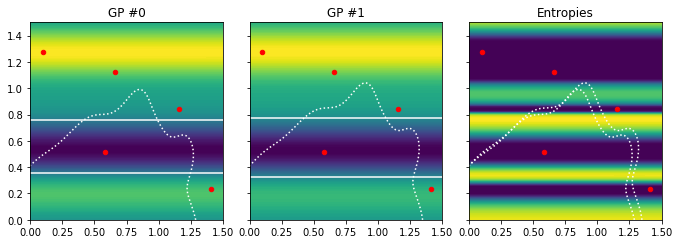

0.6616767193399375


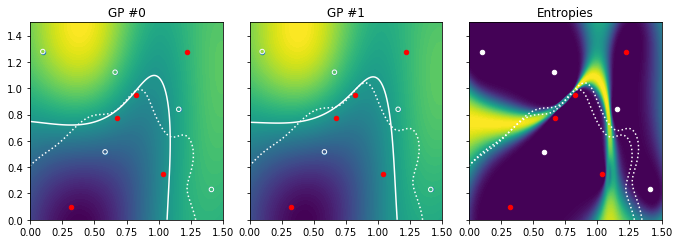

0.8949574279509546


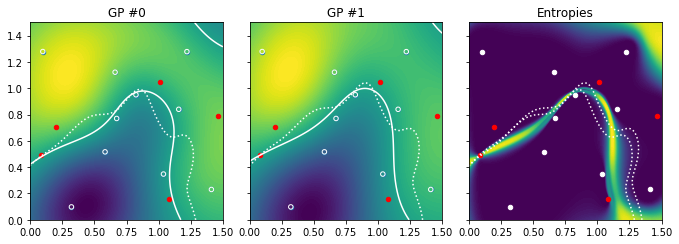

0.9099129079286468


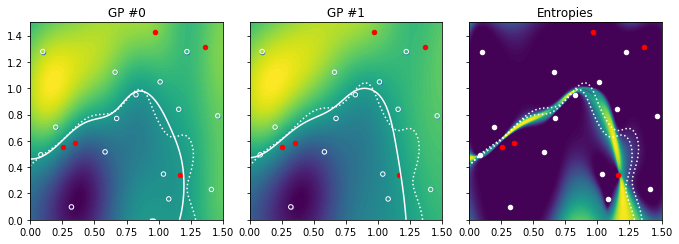

0.9504655521898688


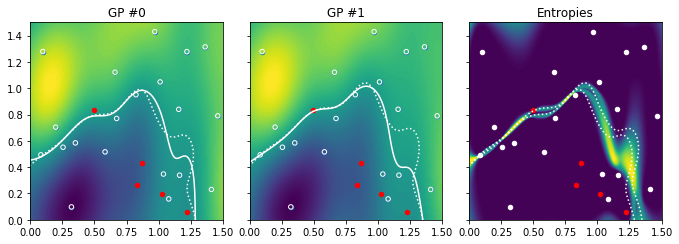

0.9674268959434908


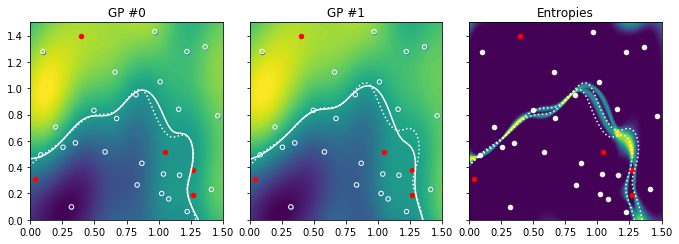

0.9834152730221292


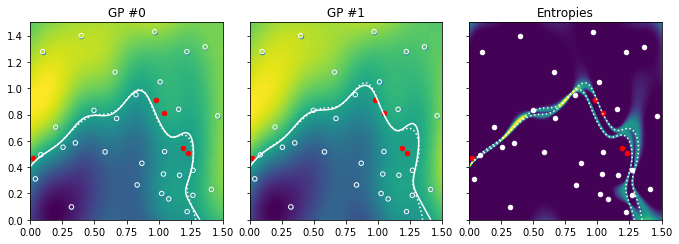

0.9930667884294917


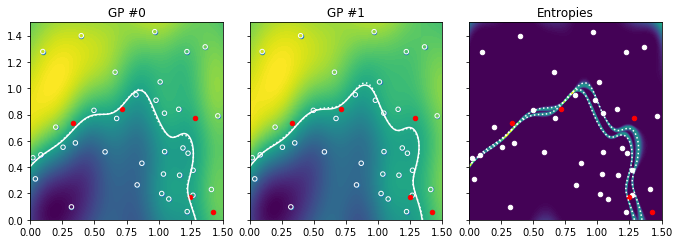

0.9965176872116814


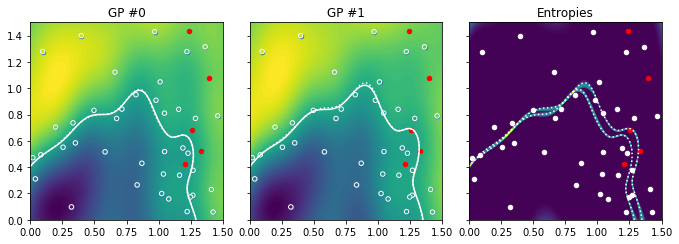

0.9971309870627185


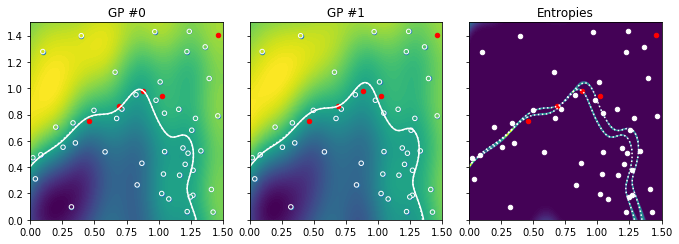

0.9987201939480266


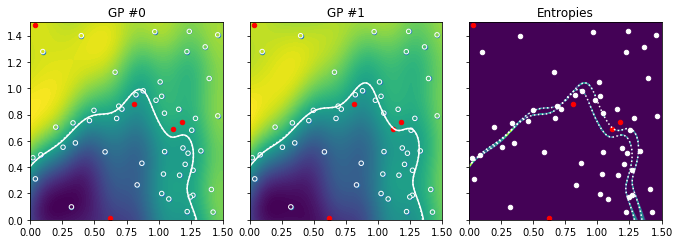

0.9988743427470519


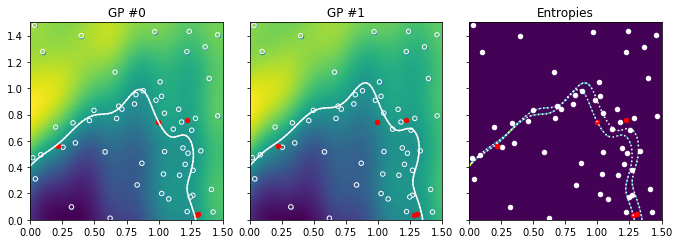

0.9997167489018632


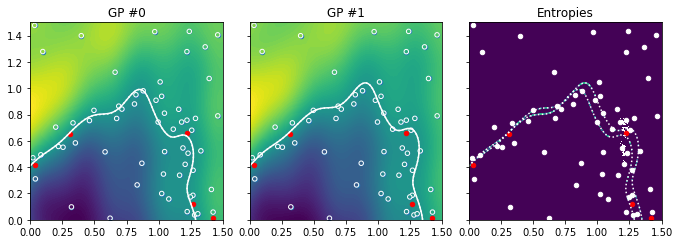

0.9998066978145073


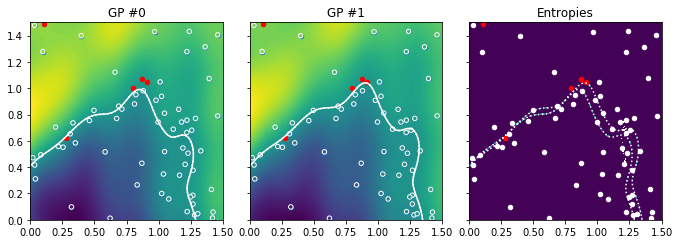

0.9998568384808675


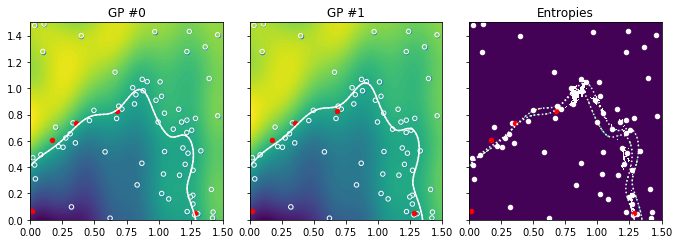

0.9999579556981447


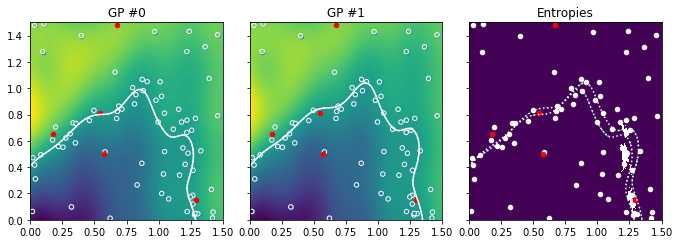

0.9999484560447949


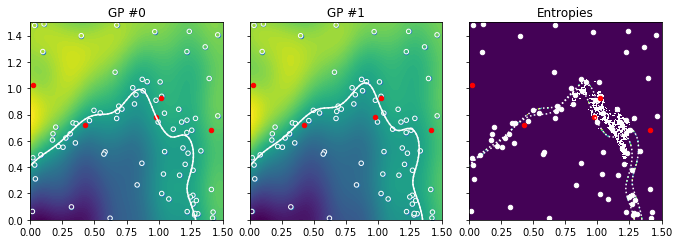

0.999955287019165


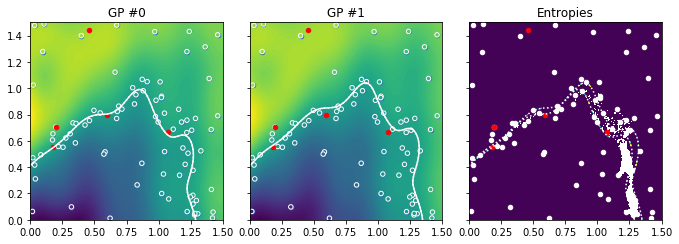

0.9999601237201995


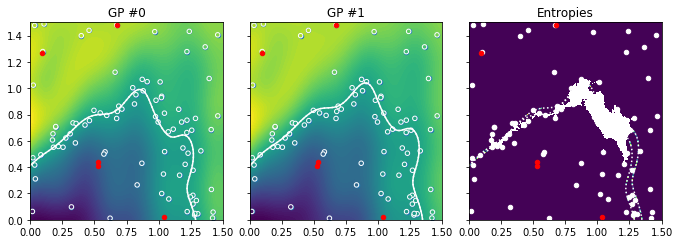

0.999947007592167


In [3]:
N_UPDATES = 19
N_BATCH = 5

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)

learner = excursion.Learner(scandetails)
learner.initialize()

for index in range(N_UPDATES):
    plot_and_save(
        workdir, index, learner.gps,learner.X,learner.y_list,learner.scandetails, batchsize = (N_BATCH if index > 0 else len(learner.X)), evaluate_truth = True
    )
    print(learner.metrics[-1]['confusion']['t'])
    newX =  learner.suggest(batchsize=N_BATCH)
    learner.evaluate_and_tell(newX)

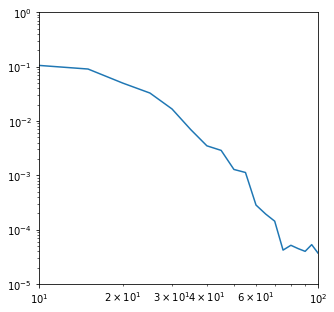

In [9]:
plt.plot([t['npoints'] for t in learner.metrics],[1-t['confusion']['t'] for t in learner.metrics])
plt.loglog()
plt.ylim(1e-5,1)
plt.xlim(10,100)
plt.gcf().set_size_inches(5,5)